In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import urllib3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
# 1. Data Generation
a=np.random.randn(1000,2)

In [4]:
a=pd.DataFrame(a)
a.columns = ['x0','x1']
a

,x0,x1
0,1.008366,2.733925
1,1.376906,0.275593
2,1.060060,-3.528144
3,0.751252,1.273029
4,2.530185,-1.858626
...,...,...
995,0.247963,-0.664896
996,1.246621,-0.433437
997,0.369130,0.618941
998,0.752190,-1.805463


In [4]:
b=np.random.randint(0,2,1000)
b=b.reshape(-1,1)
y=pd.DataFrame(b)
y.columns = ['y']
y

,y
0,1
1,1
2,1
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [5]:
df=pd.concat( [a,y], axis=1 )
df

,x0,x1,y
0,-0.355148,0.157427,1
1,-0.643712,1.673891,1
2,0.096004,-1.204004,1
3,-0.082320,-0.484804,0
4,0.030799,1.776897,0
...,...,...,...
995,0.223717,2.052224,0
996,0.055554,-1.189911,1
997,-0.254031,-1.794257,0
998,1.074087,-1.120655,0


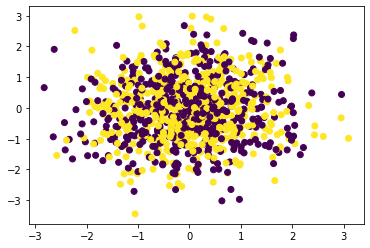

In [6]:
plt.scatter(df['x0'],df['x1'], marker='o',c=df['y']) 
plt.show()

In [7]:
# 2. Model Construction
model=LogisticRegression()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(a,y,test_size=0.3)

In [9]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [10]:
#3. Validation - 0%

In [11]:
# 4. result
model.predict_proba(X_test)

array([[0.47695094, 0.52304906],
       [0.51056568, 0.48943432],
       [0.5065128 , 0.4934872 ],
       [0.49563389, 0.50436611],
       [0.53276516, 0.46723484],
       [0.48262816, 0.51737184],
       [0.50168008, 0.49831992],
       [0.48287988, 0.51712012],
       [0.48815553, 0.51184447],
       [0.51643895, 0.48356105],
       [0.50425746, 0.49574254],
       [0.52651789, 0.47348211],
       [0.46609596, 0.53390404],
       [0.54083789, 0.45916211],
       [0.48204505, 0.51795495],
       [0.5221868 , 0.4778132 ],
       [0.46978176, 0.53021824],
       [0.48245771, 0.51754229],
       [0.51210365, 0.48789635],
       [0.50260499, 0.49739501],
       [0.48560066, 0.51439934],
       [0.53823865, 0.46176135],
       [0.49298569, 0.50701431],
       [0.47866721, 0.52133279],
       [0.52599234, 0.47400766],
       [0.51729071, 0.48270929],
       [0.46566793, 0.53433207],
       [0.52507211, 0.47492789],
       [0.51963494, 0.48036506],
       [0.4999973 , 0.5000027 ],
       [0.

In [12]:
# model accuracy
model.score(X_test,y_test)

0.49

In [13]:
from sklearn.metrics import confusion_matrix

y_true=y_test
y_pred=model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tn, fp, fn, tp)

79 65 88 68


In [14]:
accuracy=(tp+tn)/(tp+fp+fn+tn)
accuracy

0.49

In [15]:
# model weights and the corresponded terms
model.coef_

array([[0.07116106, 0.01335086]])

In [16]:
model.intercept_

array([-0.00469452])

In [17]:
# 所以: yi=L(-0.02 -0.04*xi0 +0.07*xi1)

<ipython-input-18-97468d710575>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


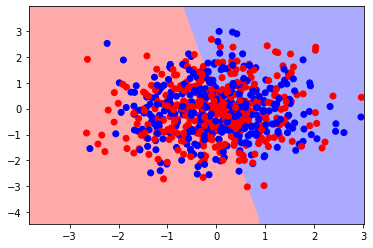

In [18]:
# show the decision boundary with a figure

from matplotlib.colors import ListedColormap

h = 0.02
x_min, x_max = X_test['x0'].min() - 1, X_test['x0'].max() + 1
y_min, y_max = X_test['x1'].min() - 1, X_test['x1'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)) 
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) 
cmap_bold = ListedColormap(['#FF0000', '#003300', '#0000FF'])
#把預測的結果在平面座標上畫出
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# 畫出訓練集
plt.scatter(X_train['x0'], X_train['x1'], c=[y_train], cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()